## Index Sort Data Analysis

Here, we follow Peter's 5 pillars of data exploration to analyze the dataset given to us by Tatsuya Araki.

### Step 1: The Data

This data is the result of an index sort (FACS?) on B Cells experiment. 

TODO - Short explanation about replay experiment from Will's slides. Then short explanation of the experiments generally, and finally, how this problem fits in and exactly what the problem is.

Here is the summary provided to us in the slack message:


> Attached please find zipped raw index sort csv files for GCs that I have index sort for, and also my work-in-progress GC database containing only relevant(?) columns.

>Just to note, that for index sort files you would need to skip several lines at the top before importing the data table.
Unfortunately column names are not always consistent (we used two sorters simultaneously to sort) so you might need to grep for “IGY” for chigy (antigen) and “IGK” for kappa.

> For kappa, it can be RFP or tdTomato depending on which files, but they are functionally the same.
For some reason the export files contain Mean, Geo Mean, and Median for each colors but they are mostly the same. I suggest to take Geo Mean or Median because Mean might have some negative values which would make no sense for the analysis (this has to do with flow cytometry compensation). Where mean gives negative values, Geo Mean /Median is empty.

>GC database is relatively straightforward. Minimally, the columns to focus would be GC_num and well, which would tell you which cells to join the index sort values to.

>I do have additive values of deltaKD, deltaExpression, and deltaPSR based on final variant score table that Tyler posted some time ago. I think there was one cell which had a mutation that DMS didn’t have a value for, and that was simply ignored.
If need be, I also do have list of HC and LC mutations (HCmut and LCmut) separated by a colon for every cells, if re-calculation etc. is needed.

> fasta_gctree_HK is the input sequence used for gctree. You will find, for convenience, that I also have H alone (fasta_gctree_H), K alone (fasta_gctree_K), and amino acid version of the concatenated sequence (seq_aa_HK) if needed. It might potentially be helpful for @psathyrella if you still need to supply only H or K sequence to partis to get the selection metrics. - T

In [1]:
! tree files/ | head

files/
├── 211021PR1_total_select.csv
├── Attic
│   ├── __MACOSX
│   │   └── PR index sort data
│   └── PR index sort data.zip
└── sort_data
    ├── 210831 INX_GC21_001.csv
    ├── 210831 INX_GC22_001.csv
    ├── 210831 INX_GC23_001.csv


In [2]:
! ls -a files/sort_data

 .			   '210901 INX_GC42_001.csv'  '210901 INX_GC67_001.csv'
 ..			   '210901 INX_GC43_001.csv'  '210901 INX_GC68_001.csv'
'210831 INX_GC21_001.csv'  '210901 INX_GC44_001.csv'  '210901 INX_GC69_001.csv'
'210831 INX_GC22_001.csv'  '210901 INX_GC45_001.csv'  '210901 INX_GC70_001.csv'
'210831 INX_GC23_001.csv'  '210901 INX_GC46_001.csv'  '210901 INX_GC71_001.csv'
'210831 INX_GC24_001.csv'  '210901 INX_GC47_001.csv'  '210901 INX_GC72_001.csv'
'210831 INX_GC25_001.csv'  '210901 INX_GC47_002.csv'  '210901 INX_GC73_001.csv'
'210831 INX_GC26_001.csv'  '210901 INX_GC48_001.csv'  '210902 INX_GC74_001.csv'
'210831 INX_GC28_001.csv'  '210901 INX_GC50_001.csv'  '210902 INX_GC75_001.csv'
'210831 INX_GC29_001.csv'  '210901 INX_GC55_001.csv'  '210902 INX_GC76_001.csv'
'210831 INX_GC30_001.csv'  '210901 INX_GC56_001.csv'  '210902 INX_GC77_001.csv'
'210831 INX_GC31_001.csv'  '210901 INX_GC57_001.csv'  '210902 INX_GC78_001.csv'
'210831 INX_GC32_001.csv'  '210901 INX_GC58_001.csv'  '210902 INX_GC79_001.cs

In [3]:
! ls -l files/sort_data/*.csv | wc -l

51


Looks like we have 50 total sort files, 13 lines need to be skipped for each.

In [4]:
import pandas as pd
sort_file = pd.read_csv("files/sort_data/210831 INX_GC21_001.csv", skiprows=13)

In [5]:
! head -n 13 'files/sort_data/210831 INX_GC21_001.csv'

In [6]:
! grep 'Sort Setup' files/sort_data/*.csv

In [7]:
print(sort_file.columns)

Index(['Well', 'All Events #Events', 'All Events PA+ GFP-A Geo Mean',
       'All Events PA+ GFP-A Mean', 'All Events PA+ GFP-A Median',
       'All Events CD38 APC-A Geo Mean', 'All Events CD38 APC-A Mean',
       'All Events CD38 APC-A Median', 'All Events TCRB APC-Cy7-A Geo Mean',
       'All Events TCRB APC-Cy7-A Mean', 'All Events TCRB APC-Cy7-A Median',
       'All Events IGY BV421-A Geo Mean', 'All Events IGY BV421-A Mean',
       'All Events IGY BV421-A Median',
       'All Events PA Pacific Orange-A Geo Mean',
       'All Events PA Pacific Orange-A Mean',
       'All Events PA Pacific Orange-A Median', 'All Events BV650-A Geo Mean',
       'All Events BV650-A Mean', 'All Events BV650-A Median',
       'All Events IGK RFP-A Geo Mean', 'All Events IGK RFP-A Mean',
       'All Events IGK RFP-A Median', 'All Events FAS PE-Cy7-A Geo Mean',
       'All Events FAS PE-Cy7-A Mean', 'All Events FAS PE-Cy7-A Median',
       'All Events B220 BV786-A Geo Mean', 'All Events B220 BV786-A Mea

In [8]:
sort_file

,Well,All Events #Events,All Events PA+ GFP-A Geo Mean,All Events PA+ GFP-A Mean,All Events PA+ GFP-A Median,All Events CD38 APC-A Geo Mean,All Events CD38 APC-A Mean,All Events CD38 APC-A Median,All Events TCRB APC-Cy7-A Geo Mean,All Events TCRB APC-Cy7-A Mean,...,All Events IGK RFP-A Median,All Events FAS PE-Cy7-A Geo Mean,All Events FAS PE-Cy7-A Mean,All Events FAS PE-Cy7-A Median,All Events B220 BV786-A Geo Mean,All Events B220 BV786-A Mean,All Events B220 BV786-A Median,All Events Time Geo Mean,All Events Time Mean,All Events Time Median
0,A1,1,"1,154","1,154","1,154",NaN,-63,-63,222.0,222,...,67,797,797,797,"2,001","2,001","2,001","2,889","2,889","2,889"
1,A2,1,"2,062","2,062","2,062",36.0,36,36,67.0,67,...,214,"1,356","1,356","1,356","4,459","4,459","4,459","3,527","3,527","3,527"
2,A3,1,"3,335","3,335","3,335",177.0,177,177,12.0,12,...,187,"1,163","1,163","1,163","4,184","4,184","4,184","3,740","3,740","3,740"
3,A4,1,"2,076","2,076","2,076",NaN,-35,-35,203.0,203,...,212,"1,018","1,018","1,018","1,424","1,424","1,424","6,019","6,019","6,019"
4,A5,1,"1,663","1,663","1,663",213.0,213,213,139.0,139,...,165,"1,157","1,157","1,157","3,866","3,866","3,866","6,505","6,505","6,505"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,H8,1,"4,903","4,903","4,903",44.0,44,44,206.0,206,...,97,913,913,913,"2,546","2,546","2,546","71,203","71,203","71,203"
92,H9,1,"2,911","2,911","2,911",23.0,23,23,9.0,9,...,176,659,659,659,"1,485","1,485","1,485","70,331","70,331","70,331"
93,H10,1,"1,347","1,347","1,347",0.0,0,0,50.0,50,...,59,522,522,522,"1,789","1,789","1,789","69,168","69,168","69,168"
94,H11,1,"1,611","1,611","1,611",NaN,-9,-9,99.0,99,...,-32,669,669,669,"2,689","2,689","2,689","67,253","67,253","67,253"


In [9]:
import glob
total = 0
for f in glob.glob("files/sort_data/*.csv"):
    sort_file = pd.read_csv(f, skiprows=13)
    num_well = len(set(sort_file["Well"]))
    flag = ""
    if len(sort_file) != 96:
        flag += "!!!"
    total += len(sort_file)
    print(f, len(sort_file), num_well, flag)
print(total)

files/sort_data/210901 INX_GC55_001.csv 96 96 
files/sort_data/210901 INX_GC42_001.csv 96 96 
files/sort_data/210901 INX_GC73_001.csv 96 96 
files/sort_data/210901 INX_GC50_001.csv 96 96 
files/sort_data/210901 INX_GC46_001.csv 96 96 
files/sort_data/210901 INX_GC63_001.csv 96 96 
files/sort_data/210902 INX_GC76_001.csv 96 96 
files/sort_data/210901 INX_GC59_001.csv 96 96 
files/sort_data/210901 INX_GC45_001.csv 96 96 
files/sort_data/210831 INX_GC31_001.csv 96 96 
files/sort_data/210901 INX_GC71_001.csv 96 96 
files/sort_data/210901 INX_GC70_001.csv 96 96 
files/sort_data/210902 INX_GC80_001.csv 96 96 
files/sort_data/210831 INX_GC30_001.csv 96 96 
files/sort_data/210902 INX_GC79_001.csv 96 96 
files/sort_data/210831 INX_GC29_001.csv 96 96 
files/sort_data/210902 INX_GC81_001.csv 96 96 
files/sort_data/210902 INX_GC82_001.csv 96 96 
files/sort_data/210831 INX_GC23_001.csv 77 77 !!!
files/sort_data/210901 INX_GC47_001.csv 10 10 !!!
files/sort_data/210901 INX_GC67_001.csv 96 96 
files/s

In [10]:
import pandas as pd
db = pd.read_csv("files/211021PR1_total_select.csv").convert_dtypes()

In [11]:
db = db[db["mouse"] != 1]

In [12]:
db

,ID_HK,mouse,node,plate_num,GC_num,cell_type,well,num_HC,barcode_HC,ID_HC,...,nt_mut_total,nt_mut_silent_total,nt_mut_replacement_total,aa_replacement_total,fasta_input_HC,fasta_input_LC,fasta_gctree_H,fasta_gctree_K,fasta_gctree_HK,seq_aa_HK
170,210923P04A01HK,2,LB,32,32,GC,A01,1155,4,210923P04A01H,...,9,3,6,6,>210923P04A01H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A01K gtgttgatggagacattgtgatgactcagtc...,>210923P04A01H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A01K gacattgtgatgactcagtctcaaaaattca...,>210923P04A01HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
171,210923P04A03HK,2,LB,32,32,GC,A03,1161,4,210923P04A03H,...,13,7,6,6,>210923P04A03H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A03K gtgttgatggagacattgtgatgactcagtc...,>210923P04A03H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A03K gacattgtgatgactcagtctcaaaaattca...,>210923P04A03HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
172,210923P04A04HK,2,LB,32,32,GC,A04,1164,4,210923P04A04H,...,12,6,6,6,>210923P04A04H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A04K gtgttgatggagacattgtgatgactcagtc...,>210923P04A04H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A04K gacattgtgatgactcagtctcaaaaattca...,>210923P04A04HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
173,210923P04A05HK,2,LB,32,32,GC,A05,1167,4,210923P04A05H,...,8,4,4,4,>210923P04A05H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A05K gtgttgatggagacattgtgatgactcagtc...,>210923P04A05H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A05K gacattgtgatgactcagtctcaaaaattca...,>210923P04A05HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
174,210923P04A06HK,2,LB,32,32,GC,A06,1170,4,210923P04A06H,...,9,6,3,3,>210923P04A06H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A06K gtgttgatggagacattgtgatgactcagtc...,>210923P04A06H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A06K gacattgtgatgactcagtctcaaaaattca...,>210923P04A06HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,211006P12H06HK,5,RP,74,83,GC,H06,3819,12,211006P12H06H,...,5,3,2,2,>211006P12H06H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H06K gtgttgatggagacattgtgatgactcagtc...,>211006P12H06H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H06K gacattgtgatgactcagtctcaaaaattca...,>211006P12H06HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
956,211006P12H09HK,5,RP,74,83,GC,H09,3835,12,211006P12H09H,...,7,5,2,2,>211006P12H09H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H09K gtgttgatggagacattgtgatgactcagtc...,>211006P12H09H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H09K gacattgtgatgactcagtctcaaaaattca...,>211006P12H09HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
957,211006P12H10HK,5,RP,74,83,GC,H10,3841,12,211006P12H10H,...,5,3,2,2,>211006P12H10H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H10K gtgttgatggagacattgtgatgactcagtc...,>211006P12H10H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H10K gacattgtgatgactcagtctcaaaaattca...,>211006P12H10HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
958,211006P12H11HK,5,RP,74,83,GC,H11,3847,12,211006P12H11H,...,6,2,4,4,>211006P12H11H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H11K gtgttgatggagacattgtgatgactcagtc...,>211006P12H11H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H11K gacattgtgatgactcagtctcaaaaattca...,>211006P12H11HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...


In [13]:
len(set(db["GC_num"].astype(str) + "-" +db["well"]))

751

In [14]:
for group, group_df in db.groupby(["GC_num", "well"]):
    if len(group_df) > 1:
        print(group, len(group_df))

In [15]:
set(db["GC_num"])

{32, 38, 47, 48, 55, 58, 72, 73, 74, 78, 82, 83}

In [16]:
for group, group_data in db.groupby("well"):
    gcs = set(group_data["GC_num"])
    s = f"Well #{group} has {len(group_data)} entries from the following GC's; {gcs}"
    print(s)

Well #A01 has 8 entries from the following GC's; {32, 38, 72, 74, 78, 47, 48, 83}
Well #A02 has 8 entries from the following GC's; {32, 73, 74, 78, 47, 82, 83, 58}
Well #A03 has 8 entries from the following GC's; {32, 38, 72, 73, 74, 47, 48, 83}
Well #A04 has 11 entries from the following GC's; {32, 38, 72, 73, 74, 78, 47, 48, 83, 55, 58}
Well #A05 has 8 entries from the following GC's; {32, 38, 72, 73, 74, 78, 47, 83}
Well #A06 has 9 entries from the following GC's; {32, 38, 72, 73, 74, 78, 48, 83, 55}
Well #A07 has 10 entries from the following GC's; {32, 38, 72, 73, 74, 78, 47, 48, 55, 58}
Well #A08 has 9 entries from the following GC's; {32, 38, 72, 73, 78, 47, 48, 82, 83}
Well #A09 has 9 entries from the following GC's; {32, 38, 74, 78, 47, 82, 83, 55, 58}
Well #A10 has 10 entries from the following GC's; {32, 38, 72, 73, 74, 78, 47, 82, 83, 58}
Well #A11 has 8 entries from the following GC's; {32, 38, 73, 74, 78, 47, 83, 58}
Well #A12 has 10 entries from the following GC's; {38, 

In [17]:
for group, group_data in db.groupby("GC_num"):
    gcs = set(group_data["well"])
    s = f"GC #{group} has {len(group_data)} entries"
    print(s)

GC #32 has 86 entries
GC #38 has 85 entries
GC #47 has 79 entries
GC #48 has 60 entries
GC #55 has 40 entries
GC #58 has 54 entries
GC #72 has 62 entries
GC #73 has 61 entries
GC #74 has 67 entries
GC #78 has 68 entries
GC #82 has 23 entries
GC #83 has 66 entries


In [18]:
for item, data in db.items():
    print(item, len(set(data)))

ID_HK 751
mouse 5
node 7
plate_num 12
GC_num 12
cell_type 1
well 96
num_HC 741
barcode_HC 12
ID_HC 751
rank_HC 2
counts_HC 162
V_HC 1
D_HC 6
J_HC 2
isotype_HC 3
num_LC 751
barcode_LC 11
ID_LC 751
rank_LC 2
counts_LC 231
V_LC 1
J_LC 3
deltaKd 593
deltaExpression 591
deltaPSR 593
HCmut 381
LCmut 371
nt_mut_HC 10
nt_mut_LC 11
nt_mut_silent_HC 5
nt_mut_silent_LC 7
nt_mut_replacement_HC 9
nt_mut_replacement_LC 9
aa_replacement_HC 8
aa_replacement_LC 8
nt_mut_total 15
nt_mut_silent_total 9
nt_mut_replacement_total 12
aa_replacement_total 11
fasta_input_HC 751
fasta_input_LC 751
fasta_gctree_H 751
fasta_gctree_K 751
fasta_gctree_HK 751
seq_aa_HK 593


## reading and merging GC values

In [19]:
# 210831 INX_GC32_001.csv
import re
import glob
import os
from collections import defaultdict

s = defaultdict(int)
for i, f in enumerate(glob.glob("files/sort_data/*.csv")):
    sort_file = pd.read_csv(f, skiprows=13)
    fn = os.path.basename(f)
    s[fn.split("_")[1]] += 1

print(i+1)
print(s)
print(len(s))

51
defaultdict(<class 'int'>, {'GC55': 1, 'GC42': 1, 'GC73': 1, 'GC50': 1, 'GC46': 1, 'GC63': 1, 'GC76': 1, 'GC59': 1, 'GC45': 1, 'GC31': 1, 'GC71': 1, 'GC70': 1, 'GC80': 1, 'GC30': 1, 'GC79': 1, 'GC29': 1, 'GC81': 1, 'GC82': 1, 'GC23': 1, 'GC47': 2, 'GC67': 1, 'GC21': 1, 'GC78': 1, 'GC32': 1, 'GC26': 1, 'GC58': 1, 'GC66': 1, 'GC40': 1, 'GC68': 1, 'GC43': 1, 'GC41': 1, 'GC57': 1, 'GC24': 1, 'GC39': 1, 'GC72': 1, 'GC83': 1, 'GC64': 1, 'GC25': 1, 'GC34': 1, 'GC75': 1, 'GC69': 1, 'GC28': 1, 'GC48': 1, 'GC65': 1, 'GC38': 1, 'GC22': 1, 'GC77': 1, 'GC74': 1, 'GC44': 1, 'GC56': 1})
50


In [20]:
s = defaultdict(int)
for i, f in enumerate(glob.glob("files/sort_data/*.csv")):
    sort_file = pd.read_csv(f, skiprows=13)
    columns = sort_file.columns
    fn = os.path.basename(f)
    for c in columns:
        if "Geo Mean" in c or "Median" in c: continue
        #sp = " ".join(c.split()[2:])
        s[c] += 1

In [21]:
for item, data in s.items():
    print(f"There are {data} files that contain the '{item}' column")

There are 51 files that contain the 'Well' column
There are 51 files that contain the 'All Events #Events' column
There are 51 files that contain the 'All Events FAS PE-Cy7-A Mean' column
There are 51 files that contain the 'All Events IGY BV421-A Mean' column
There are 23 files that contain the 'All Events B220 BV785-A Mean' column
There are 51 files that contain the 'All Events TCRB APC-Cy7-A Mean' column
There are 51 files that contain the 'All Events CD38 APC-A Mean' column
There are 23 files that contain the 'All Events PA+ FITC-A Mean' column
There are 23 files that contain the 'All Events PA V500-A Mean' column
There are 23 files that contain the 'All Events IGK tdTomato-A Mean' column
There are 51 files that contain the 'All Events Time Mean' column
There are 28 files that contain the 'All Events PA+ GFP-A Mean' column
There are 28 files that contain the 'All Events PA Pacific Orange-A Mean' column
There are 28 files that contain the 'All Events BV650-A Mean' column
There are 2

In [22]:
db

,ID_HK,mouse,node,plate_num,GC_num,cell_type,well,num_HC,barcode_HC,ID_HC,...,nt_mut_total,nt_mut_silent_total,nt_mut_replacement_total,aa_replacement_total,fasta_input_HC,fasta_input_LC,fasta_gctree_H,fasta_gctree_K,fasta_gctree_HK,seq_aa_HK
170,210923P04A01HK,2,LB,32,32,GC,A01,1155,4,210923P04A01H,...,9,3,6,6,>210923P04A01H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A01K gtgttgatggagacattgtgatgactcagtc...,>210923P04A01H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A01K gacattgtgatgactcagtctcaaaaattca...,>210923P04A01HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
171,210923P04A03HK,2,LB,32,32,GC,A03,1161,4,210923P04A03H,...,13,7,6,6,>210923P04A03H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A03K gtgttgatggagacattgtgatgactcagtc...,>210923P04A03H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A03K gacattgtgatgactcagtctcaaaaattca...,>210923P04A03HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
172,210923P04A04HK,2,LB,32,32,GC,A04,1164,4,210923P04A04H,...,12,6,6,6,>210923P04A04H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A04K gtgttgatggagacattgtgatgactcagtc...,>210923P04A04H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A04K gacattgtgatgactcagtctcaaaaattca...,>210923P04A04HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
173,210923P04A05HK,2,LB,32,32,GC,A05,1167,4,210923P04A05H,...,8,4,4,4,>210923P04A05H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A05K gtgttgatggagacattgtgatgactcagtc...,>210923P04A05H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A05K gacattgtgatgactcagtctcaaaaattca...,>210923P04A05HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
174,210923P04A06HK,2,LB,32,32,GC,A06,1170,4,210923P04A06H,...,9,6,3,3,>210923P04A06H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A06K gtgttgatggagacattgtgatgactcagtc...,>210923P04A06H gaggtgcagcttcaggagtcaggacctagcc...,>210923P05A06K gacattgtgatgactcagtctcaaaaattca...,>210923P04A06HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,211006P12H06HK,5,RP,74,83,GC,H06,3819,12,211006P12H06H,...,5,3,2,2,>211006P12H06H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H06K gtgttgatggagacattgtgatgactcagtc...,>211006P12H06H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H06K gacattgtgatgactcagtctcaaaaattca...,>211006P12H06HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
956,211006P12H09HK,5,RP,74,83,GC,H09,3835,12,211006P12H09H,...,7,5,2,2,>211006P12H09H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H09K gtgttgatggagacattgtgatgactcagtc...,>211006P12H09H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H09K gacattgtgatgactcagtctcaaaaattca...,>211006P12H09HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
957,211006P12H10HK,5,RP,74,83,GC,H10,3841,12,211006P12H10H,...,5,3,2,2,>211006P12H10H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H10K gtgttgatggagacattgtgatgactcagtc...,>211006P12H10H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H10K gacattgtgatgactcagtctcaaaaattca...,>211006P12H10HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...
958,211006P12H11HK,5,RP,74,83,GC,H11,3847,12,211006P12H11H,...,6,2,4,4,>211006P12H11H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H11K gtgttgatggagacattgtgatgactcagtc...,>211006P12H11H gaggtgcagcttcaggagtcaggacctagcc...,>211006P12H11K gacattgtgatgactcagtctcaaaaattca...,>211006P12H11HK gaggtgcagcttcaggagtcaggacctagc...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...


In [23]:
import copy
import pandas as pd

new_cols = ["chingy", "kappa", "sorter"]
join_on = ["GC_num", "well"]

chingy_col = "All Events IGY BV421-A Mean"
kappa_col_1 = "All Events IGK RFP-A Mean"
kappa_col_2 = "All Events IGK tdTomato-A Mean"

flur_df = pd.DataFrame({
    f:[]
    for f in new_cols + join_on
})

for i, f in enumerate(glob.glob("files/sort_data/*.csv")):
    sort_file = pd.read_csv(f, skiprows=13)
    sorter, kc = ("RFP", kappa_col_1) if kappa_col_1 in sort_file.columns else ("tdTomato", kappa_col_2)
    doi = copy.deepcopy(sort_file[["Well", chingy_col,kc]])
    doi.rename({chingy_col:"chingy", kc:"kappa", "Well": "well"}, axis=1, inplace=True)
    if doi.dtypes["chingy"] != int:
        doi["chingy"] = doi["chingy"].str.replace(",", "").astype(int)
    if doi.dtypes["kappa"] != int:
        doi["kappa"] = doi["kappa"].str.replace(",", "").astype(int)
    fn = os.path.basename(f)
    GC_num = int(fn.split("_")[1][2:])
    doi["GC_num"] = GC_num
    doi["sorter"] = sorter

    flur_df = flur_df.append(doi)

In [24]:
db = pd.read_csv("files/211021PR1_total_select.csv")
db = db[db["mouse"]!=1].set_index(join_on)
flur_df = flur_df.set_index(join_on)

In [25]:
db_cells = set(db.index)
flur_cells = set(flur_df.index)
print(f"There are {len(db_cells)} currently sequenced, and {len(flur_cells)} index sorted cells with kappa/chingy")
print(f"There are {len(set.intersection(db_cells, flur_cells))} overlappings cells from both")

There are 751 currently sequenced, and 4781 index sorted cells with kappa/chingy
There are 192 overlappings cells from both


In [26]:
db = db.merge(flur_df, left_index=True,right_index=True, how="outer")

In [27]:
cc = db.query("ID_HK.notnull() & chingy.notnull() & kappa.notnull()").reset_index()
cc.loc[cc["chingy"] < 0, "chingy"] = 0 
cc.loc[cc["kappa"] < 0, "kappa"] = 0 

In [60]:
import seaborn as sns
import scipy.stats as st
from matplotlib import pyplot as plt

In [61]:
RFP = cc[cc["sorter"]=="RFP"]
TOM = cc[cc["sorter"]=="tdTomato"]

In [62]:
corr_rfp = st.pearsonr(RFP["chingy"], RFP["kappa"])[0]
corr_tom = st.pearsonr(TOM["chingy"], TOM["kappa"])[0]

Text(0.5, 1.0, 'Sorter = tdTomato')

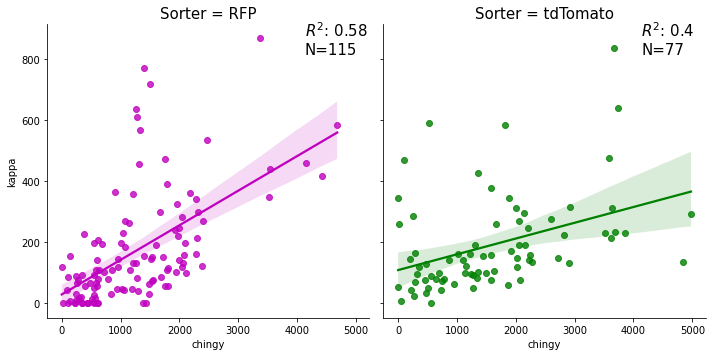

In [88]:
g = sns.lmplot(
    x = "chingy", 
    y = "kappa", 
    hue="sorter", 
    data=cc, 
    palette=dict(tdTomato="g", RFP="m"),
    col="sorter"
)
g.axes[0,0].annotate(
    f"$R^{2}$: {round(corr_rfp, 2)}\nN={len(RFP)}",
    xy=[0.8, 0.9], 
    size=15, 
    xycoords="axes fraction"
)
g.axes[0,0].set_title("Sorter = RFP", size=15)
g.axes[0,1].annotate(
    f"$R^{2}$: {round(corr_tom, 2)}\nN={len(TOM)}",
    xy=[0.8, 0.9], 
    size=15, 
    xycoords="axes fraction"
)
g.axes[0,1].set_title("Sorter = tdTomato", size=15)


In [86]:
g.savefig("index_sort_chingy_kappa_ratio.pdf")